LEVEL 1

In [1]:
# importing pandas module
import pandas as pd

# importing matplot module
import matplotlib.pyplot as plt

# importing numpy module
import numpy as np

# creating the data frame 
data = pd.read_csv("Dataset.csv")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


TASK 1 - TOP CUISINES

1. Determine the top three most common cuisines in the dataset.

In [2]:
data['Cuisines'] = data['Cuisines'].str.split(', ')
data_explode = data.explode('Cuisines')
top_cuisines = data['Cuisines'].value_counts().head(3)
print("The top three most commom cuisines are: ")
print(top_cuisines)

The top three most commom cuisines are: 
Cuisines
[North Indian]             936
[North Indian, Chinese]    511
[Chinese]                  354
Name: count, dtype: int64


2. Calculate the percentage of restaurants that serve each of the top cuisines.

In [3]:
grouped_data = data_explode.groupby(['Restaurant Name','Cuisines']).size().reset_index(name='count')
pivot_data = grouped_data.pivot(index='Restaurant Name', columns='Cuisines', values='count').fillna(0)
top_3_cuisines = pivot_data.sum().nlargest(3)
percentage_per_cuisine = (pivot_data[top_3_cuisines.index]>0).sum()/len(data['Restaurant Name'].unique())*100
print("The percentage of restaurants that serve the top three cuisines are: ")
for Cuisines, percentage in percentage_per_cuisine.items():
    print(f"Cuisines: {Cuisines}, Percentage: {percentage:.2f}%")

The percentage of restaurants that serve the top three cuisines are: 
Cuisines: North Indian, Percentage: 44.45%
Cuisines: Chinese, Percentage: 31.47%
Cuisines: Fast Food, Percentage: 17.69%


TASK 2 - CITY ANALYSIS

1. Identify the city with the highest numberof restaurants in the dataset.

In [4]:
pd.set_option('display.max_rows', None)
city_data = data.groupby('City')
print("Now the data has been grouped as per the city")
restaurant_count_by_city = city_data['Restaurant Name'].count()
print("Number of restaurants in each city: ")
print(restaurant_count_by_city)
city_with_max_restaurants = restaurant_count_by_city.idxmax(axis=0,skipna=True)
print("\n")
print("The city with max restaurants is: ")
print(city_with_max_restaurants)

Now the data has been grouped as per the city
Number of restaurants in each city: 
City
Abu Dhabi                   20
Agra                        20
Ahmedabad                   21
Albany                      20
Allahabad                   20
Amritsar                    21
Ankara                      20
Armidale                     1
Athens                      20
Auckland                    20
Augusta                     20
Aurangabad                  20
Balingup                     1
Bandung                      1
Bangalore                   20
Beechworth                   1
Bhopal                      20
Bhubaneshwar                21
Birmingham                  20
Bogor                        2
Boise                       20
Bras�_lia                   20
Cape Town                   20
Cedar Rapids/Iowa City      20
Chandigarh                  18
Chatham-Kent                 1
Chennai                     20
Clatskanie                   1
Cochrane                     1
Coimbatore   

2. Calculate the average rating forrestaurants in each city.

In [5]:
average_rating = city_data.agg({'Aggregate rating': 'mean'})
print("Average rating for restaurants in each city is as follows: ")
print(average_rating)

Average rating for restaurants in each city is as follows: 
                        Aggregate rating
City                                    
Abu Dhabi                       4.300000
Agra                            3.965000
Ahmedabad                       4.161905
Albany                          3.555000
Allahabad                       3.395000
Amritsar                        3.685714
Ankara                          4.305000
Armidale                        3.500000
Athens                          4.200000
Auckland                        4.275000
Augusta                         4.130000
Aurangabad                      3.375000
Balingup                        3.200000
Bandung                         4.200000
Bangalore                       4.375000
Beechworth                      4.600000
Bhopal                          3.950000
Bhubaneshwar                    3.980952
Birmingham                      3.680000
Bogor                           3.850000
Boise                           4.2600

3. Determine the city with the highestaverage rating.

In [6]:
highest_average_rating = average_rating.idxmax(axis=0,skipna=True)
print("The city having the highest average rating is: ")
print(f"{highest_average_rating}")

The city having the highest average rating is: 
Aggregate rating    Inner City
dtype: object


TASK 3 : Price Range Distribution

1. Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

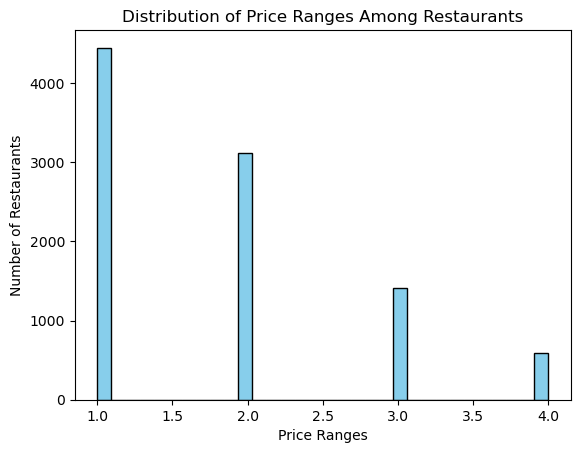

In [7]:
price_range = data['Price range']
price_range_counts = price_range.value_counts()
sorted_price_range = price_range_counts.index.sort_values()
plt.hist(price_range, bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('Price Ranges')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.show()

2. Calculate the percentage of restaurants in each price range category.

In [8]:
price_range_percentage = data['Price range'].value_counts(normalize=True) * 100
print("Percentage of restaurants in each price range category is : ")
print(price_range_percentage)

Percentage of restaurants in each price range category is : 
Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: proportion, dtype: float64


TASK 4 : Online Delivery

1. Determine the percentage of restaurants that offer online delivery.

In [9]:
online_delivery_percentage = data['Has Online delivery'].value_counts(normalize=True) * 100
print("Percentage of restaurants that offers online delivery is : ")
print(online_delivery_percentage)

Percentage of restaurants that offers online delivery is : 
Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


2. Compare the average ratings of restaurants with and without online delivery.

In [10]:
data_has_online_delivery_rating = data[data['Has Online delivery'] == 'Yes']
data_does_not_have_online_delivery_rating = data[data['Has Online delivery'] == 'No']
average_rating_with_delivery = data_has_online_delivery_rating['Aggregate rating'].mean()
average_rating_without_delivery = data_does_not_have_online_delivery_rating['Aggregate rating'].mean()
print(f"Average Rating with Online Delivery: {average_rating_with_delivery:.2f}")
print(f"Average Rating without Online Delivery: {average_rating_without_delivery:.2f}")

Average Rating with Online Delivery: 3.25
Average Rating without Online Delivery: 2.47
